In [ ]:
# Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage

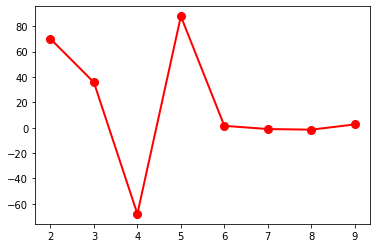

In [ ]:
# Constant
DATASET1 = "/content/drive/MyDrive/DS_3Clusters_999Points.txt"
DATASET2 = "/content/drive/MyDrive/DS2_3Clusters_999Points.txt"
DATASET3 = "/content/drive/MyDrive/DS_5Clusters_10000Points.txt"


def dataset_to_list_points(dir_dataset):
    """
    Read a txt file with a set of points and return a list of objects Point
    :param dir_dataset:
    """
    points = list()
    with open(dir_dataset, 'rt') as reader:
        for point in reader:
            points.append(np.asarray(list(map(float, point.split("::")))))
    return points


def plot_gap(dataset):
    points = dataset_to_list_points(dataset)
    
    # Calculate distances between points or groups of points
    Z = linkage(points, metric='euclidean', method='ward')

    # Obtain the last 10 distances between points
    last = Z[-10:, 2]
    num_clustres = np.arange(1, len(last) + 1)

    # Calculate Gap
    gap = np.diff(last, n=2)  # second derivative
    plt.plot(num_clustres[:-2] + 1, gap[::-1], 'ro-', markersize=8, lw=2)
    plt.show()

plot_gap(DATASET3)



In [ ]:
# Importar el módulo Kmeans desde sklearn.cluster
from sklearn.cluster import KMeans
# Más abaja explicamos brevemente los métodos para implementar el modelo:
data= pd.read_csv('/content/drive/MyDrive/Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
### Datos de Muestra ###
# Se seleccionan unos datos al azar para posteriormente verificar el clúster al que pertenecen
indices = [26, 176, 392]
muestras = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop=True)
data = data.drop(indices, axis = 0)

In [ ]:
### Procesamiento de los datos ###
# Eliminamos las columnas de región y canal
data = data.drop(['Region', 'Channel'], axis=1)
muestras = muestras.drop(['Region', 'Channel'], axis=1)

In [ ]:
print(data.shape)
data

(437, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [ ]:
print(muestras.shape)
muestras

(3, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9898,961,2861,3151,242,833
1,45640,6958,6536,7368,1532,230
2,518,4180,3600,659,122,654


In [ ]:
# Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [ ]:
### Análisis de Machine Learning con K-Means ###
from sklearn.cluster import KMeans

# Se determina las variables a evaluar
X = data_escalada.copy()

## Hallar el valor óptimo de K ##
# Se aplicará el método de codo para hallar K
# Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = []
for i in range(1,13):
    algoritmo = KMeans(n_clusters=i, init='k-means++', 
                      max_iter=300, n_init=10)
    algoritmo.fit(X)
    # Para cada K, secalcula la suma total
# Para cada K, secalcula la suma total del cuadrado errores dentro del clúster
    inercia.append(algoritmo.inertia_)

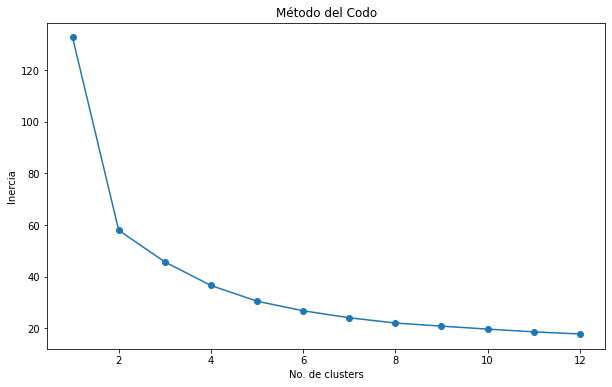

In [ ]:
#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 13)), inercia, marker='o')
plt.show()

In [ ]:
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 6, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

#Se entrena el algoritmo
algoritmo.fit(X)

#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 3
Muestra 1 se encuentra en el clúster: 3
Muestra 2 se encuentra en el clúster: 1


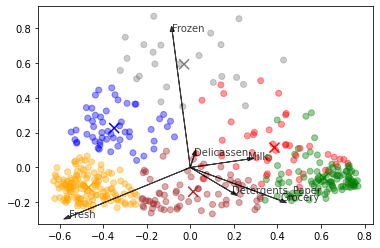

In [ ]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()